## 개요 

참여중인 딥러닝 스터디 3주차 기록입니다.

* Neural Network로 MNIST다루기
* 강사님이 주신 샘플코드 참고해서, 나에게 맞추거나 추가공부 진행

## 과제 작성 (NeuralNetwork / NonLinear)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.utils import to_categorical

from tensorflow.keras.datasets import mnist

### Mnist Dataset로딩 및 전처리

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
for i in (x_train, y_train, x_test, y_test):
    print(i.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
# Shape 오류 발생하여 원핫인코딩 수행
# X는 (28, 28)인데 Y는 그냥 정답(5면 5)여서 그런듯 함
# ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 10)

x_train = x_train.reshape((60000, 28, 28, 1))
y_train_one_hot = to_categorical(y_train, num_classes=10)

x_test = x_test.reshape((10000, 28, 28, 1))
y_test_one_hot = to_categorical(y_test, num_classes=10)

### 모델구성
* Codestral에게 MNIST데이터셋에 적합한 파라미터와 레이어로 조정해달라고 하여 맞춤
* 수업 때 거의 ReLU에요라고 들었는데 마지막 빼고는 거의 ReLU가 사용되었음
* Softmax는 주로 마지막 층에 쓰인다고 들은 적이 있는데 여기서도 동일하게 되었음<br>
  (추가로 알아볼때도 주로 마지막레이어에 쓰인다는 내용 다수 확인)

In [ ]:
# 모델 구성
# Mistral에게 Mnist데이터셋이 적합한 레이어와 파라메터로 구성해달라고 해서 조정
model = Sequential([
    layers.Input((28,28,1)),
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_52          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_53          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_54          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 256)            │     1,605,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_55          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,703,050 (6.50 MB)

 Trainable params: 1,702,090 (6.49 MB)

 Non-trainable params: 960 (3.75 KB)

### 모델학습 및 학습과정 시각화

In [ ]:
history = model.fit(x_train, y_train_one_hot, epochs=10, batch_size=64, verbose=0)
history.history

{'accuracy': [0.9526000022888184,
  0.9849333167076111,
  0.9872333407402039,
  0.9904000163078308,
  0.9906499981880188,
  0.9917166829109192,
  0.9925500154495239,
  0.9933333396911621,
  0.9935333132743835,
  0.9948333501815796],
 'loss': [0.09701579809188843,
  0.014779138378798962,
  0.01159658282995224,
  0.009130637161433697,
  0.008214634843170643,
  0.007283014710992575,
  0.0065074339509010315,
  0.005834747105836868,
  0.005641818046569824,
  0.004907044116407633]}

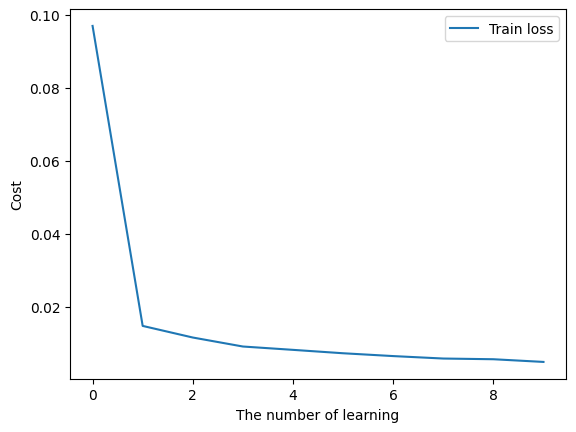

In [ ]:
plt.plot(history.history['loss'], label='Train loss')
plt.xlabel('The number of learning')
plt.ylabel('Cost')
plt.legend()
plt.show()

### 모델평가 및 모델 활용한 예측

* 모델평가

In [ ]:
model.evaluate(x_test, y_test_one_hot, verbose=0)

[0.003361478913575411, 0.994700014591217]

* 예측

In [ ]:
y_predict_one_hot = model.predict(x_test)
y_predict = np.argmax(y_predict_one_hot, axis=1)
y_predict

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### [추가] 예측치가 틀린값 추출 후 시각화해보기

* 예측 틀린 값 확인

In [ ]:
import pandas as pd

df_answersheet = pd.DataFrame(y_test, columns=['Y_test(정답)'])
df_answersheet['Y_pred(예측)'] = np.argmax(y_predict_one_hot, axis=1)
df_answersheet['비교'] = (df_answersheet['Y_test(정답)'] == df_answersheet['Y_pred(예측)'])
df_answersheet

,Y_test(정답),Y_pred(예측),비교
0,7,7,True
1,2,2,True
2,1,1,True
3,0,0,True
4,4,4,True
...,...,...,...
9995,2,2,True
9996,3,3,True
9997,4,4,True
9998,5,5,True


In [ ]:
df_answersheet['비교'].value_counts()

비교
True     9947
False      53
Name: count, dtype: int64

* 예측 틀린 값들의 시각화 및 정답/예측치 비교

In [ ]:
idx_false = df_answersheet[df_answersheet['비교'] == False].index
idx_false

Index([ 445,  449,  947, 1014, 1232, 1242, 1247, 1709, 1878, 1901, 2035, 2070,
       2118, 2130, 2135, 2414, 2454, 2597, 2654, 2896, 2939, 2953, 3422, 3520,
       3808, 3985, 4027, 4176, 4284, 4571, 4639, 4699, 4740, 4761, 5749, 5955,
       6571, 6576, 6597, 6625, 8408, 9009, 9015, 9019, 9587, 9620, 9638, 9642,
       9664, 9679, 9692, 9698, 9729],
      dtype='int64')

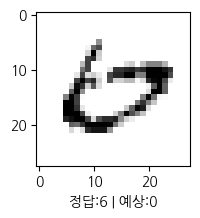

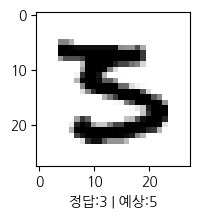

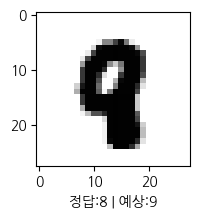

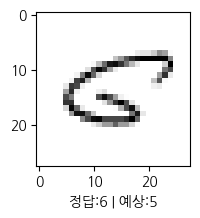

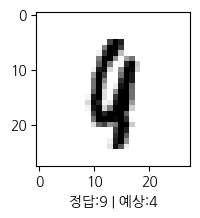

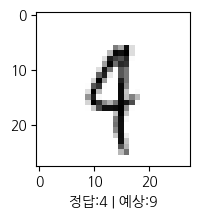

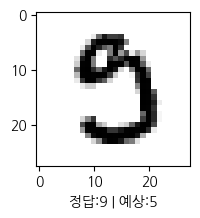

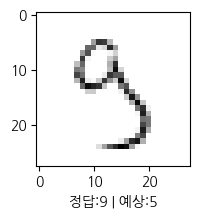

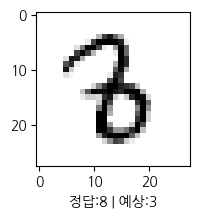

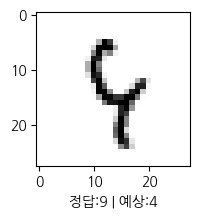

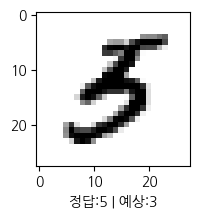

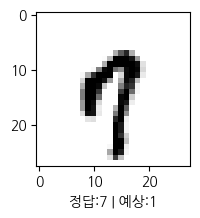

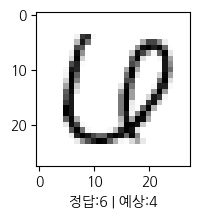

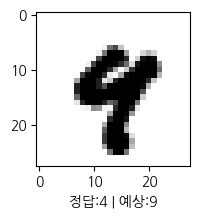

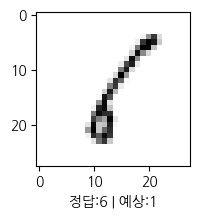

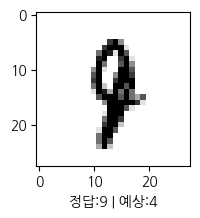

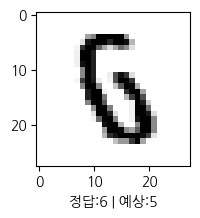

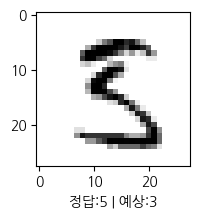

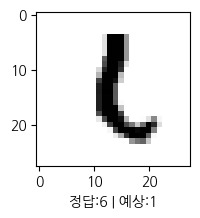

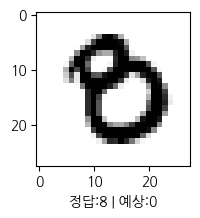

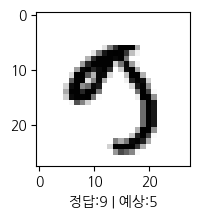

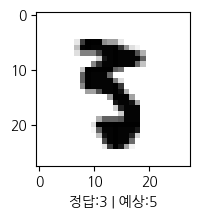

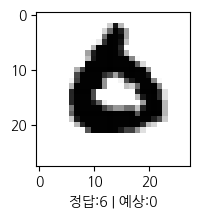

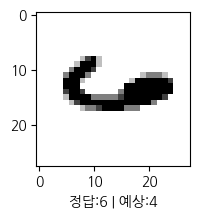

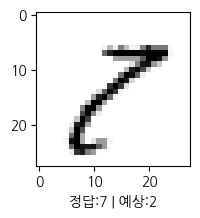

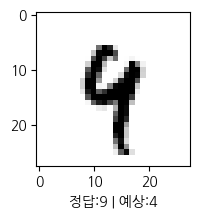

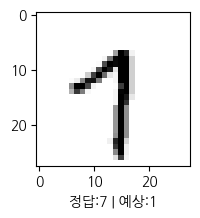

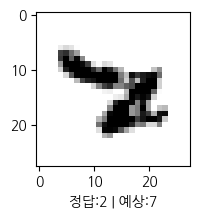

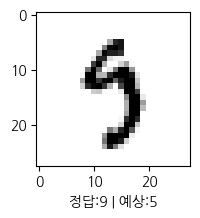

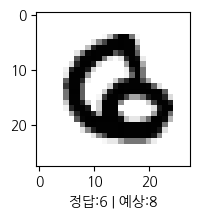

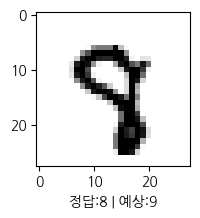

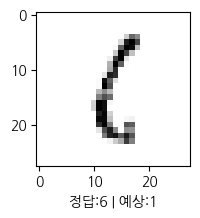

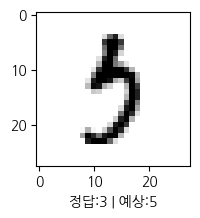

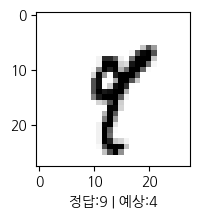

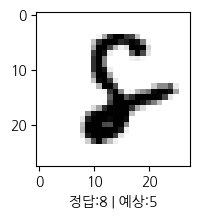

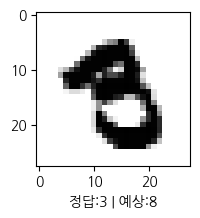

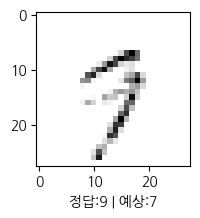

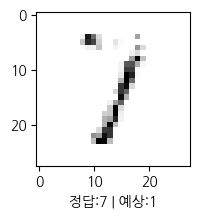

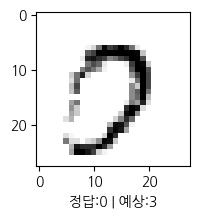

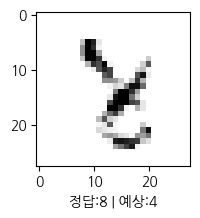

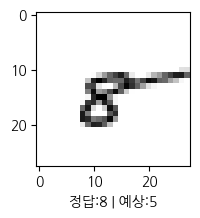

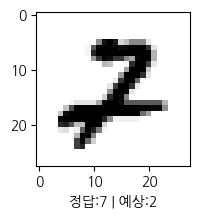

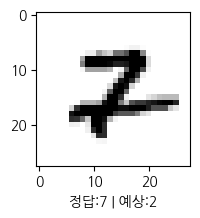

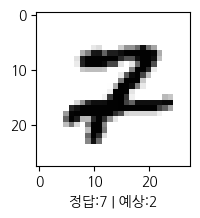

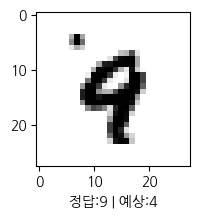

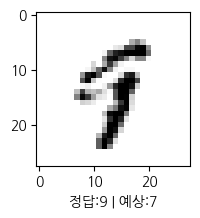

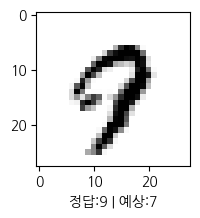

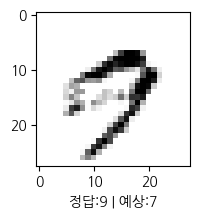

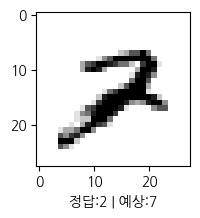

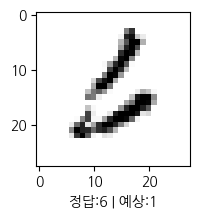

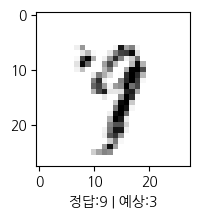

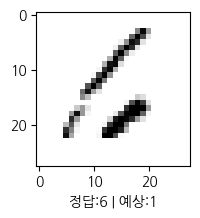

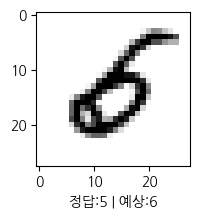

In [ ]:
import koreanize_matplotlib

# 시각화로 Validation 확인
for i in idx_false.tolist():
    plt.figure(figsize=(2,2))

    # 결과 확인
    plt.xlabel(f"정답:{y_test[i]} | 예상:{y_predict[i]}")
    plt.imshow(np.reshape(x_test[i], [28, 28]), cmap=plt.cm.binary)
    plt.show()